# PROJECT NAME : RETAIL SALES PREDICTION.
## Project Type: Regression


---



---

## Project Summary:

---

---

Rossmann operates over 3000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for upto six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of indivitual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. We are provided with historical sales data for **1115 Rossmann stores**. The task is to forecast the **sales column** for the test set. Some of the stores in the dataset were temporarily closed for refurbishment.

## Data Description of each column in our dataset:

---

---


1.   **Id** ⇒ Unique entry id.
2.   **Store** ⇒ Store id
1.   **Sales** ⇒ Sales made for the day
1.   **Customers** ⇒ No. of Customers for the day
1.   **Open** ⇒ Wheather the store was opened or closed (0: closed & 1: open).
2.   **StateHoliday** ⇒ Wheather the day was State holiday or not.
2.   **SchoolHoliday** ⇒ Wheather the day was School holiday or not.
2.   **StoreType** ⇒ Types of Stores.
1.   **Assortment** ⇒ Types of assortment.
1.   **Competitiondistance** ⇒ Distance from the nearest competetor store.
2.   **promo** ⇒ Store running promo or not.
2.   **Promo2** ⇒ Store running consequitive promo or not.




In [1]:
# Importing all the Library.
import numpy as np
import pandas as pd

from datetime import datetime
from datetime import date
from datetime import timedelta

import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as px
import seaborn as sns

from scipy.stats import norm
from scipy.stats import uniform
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
sales_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/store.csv")

In [4]:
rossmann_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DATA SCIENCE/MACHINE LEARNING/PROJECT/REGRESSION/DATA/Rossmann Stores Data.csv")

## Let's check sales_df

In [5]:
sales_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
sales_df.shape

(1115, 10)

In [7]:
sales_df.columns.tolist()

['Store',
 'StoreType',
 'Assortment',
 'CompetitionDistance',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval']

In [8]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [9]:
sales_df.describe(include= 'all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


In [10]:
# duplicates
len(sales_df[sales_df.duplicated()])

0

In [11]:
# Total count of Null values.
sales_df.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

### As there are lots of NaN values in CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2SinceWeek, Promo2SinceYear, PromoInterval, we will drop those columns.

In [12]:
cols_to_drop= ['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

In [13]:
# Dropping the columns with more Null values.
sales_df.drop(cols_to_drop, inplace= True, axis=1)

In [14]:
sales_df.head(2)

,Store,StoreType,Assortment,CompetitionDistance,Promo2
0,1,c,a,1270.0,0
1,2,a,a,570.0,1


### As CompetitionDistance column contains less Null values, we won't remove that column. Rather we would replace those Null values.

<Axes: xlabel='CompetitionDistance', ylabel='Density'>

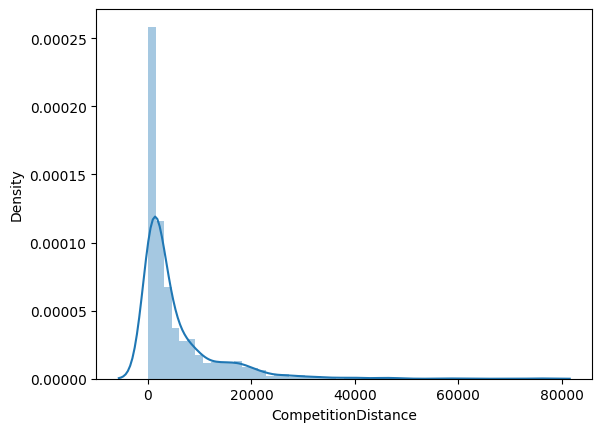

In [15]:
sns.distplot(sales_df.CompetitionDistance)

#### As the distribution is skewed here, it is wise to replace the Null values with Median.


In [16]:
sales_df['CompetitionDistance'].fillna(sales_df.CompetitionDistance.median(), inplace= True)

In [17]:
sales_df.isna().sum()

Store                  0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

In [18]:
sales_df.StoreType.value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

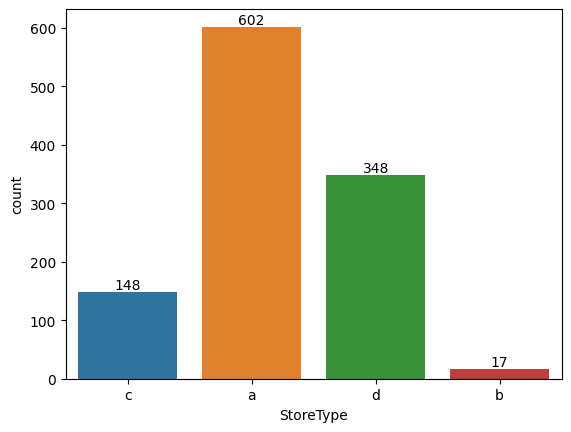

In [19]:
# Let's check the store type column.
fig= sns.countplot(x= 'StoreType', data= sales_df)

for i in fig.containers:
    fig.bar_label(i)

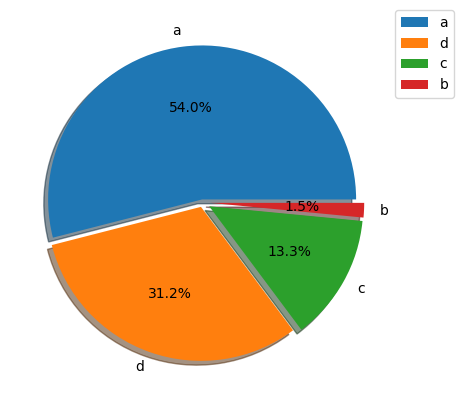

In [20]:
# Let's check it with a pie chart
plt.figure(figsize=(10,5))
explode= [0.02, 0.03, 0.05,0.05]
plt.pie(sales_df['StoreType'].value_counts(), labels= sales_df.StoreType.value_counts().index, startangle=0, autopct= '%1.1f%%', shadow= True, explode= explode)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
plt.show()

## Here we can see that type-a store type is maximum i.e 54% in our data set followed by type-d i.e about 31%.

## While type-b store types is comparatively less i.e  only 1.5%.

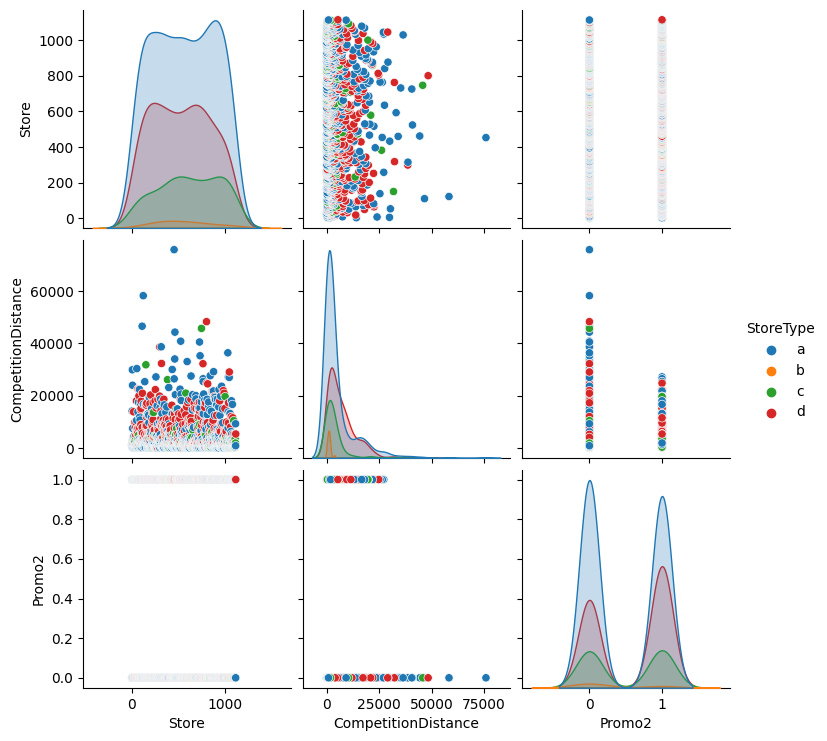

In [21]:
# Let's use pairplot for StoreType to check pairwise relationships between variables within a dataset.
fig= sns.pairplot(sales_df, hue= 'StoreType', hue_order=['a', 'b', 'c', 'd'])

## Here we can see that most of the stores are located in 20000 meter range. So we can say that cometetion is high over here.

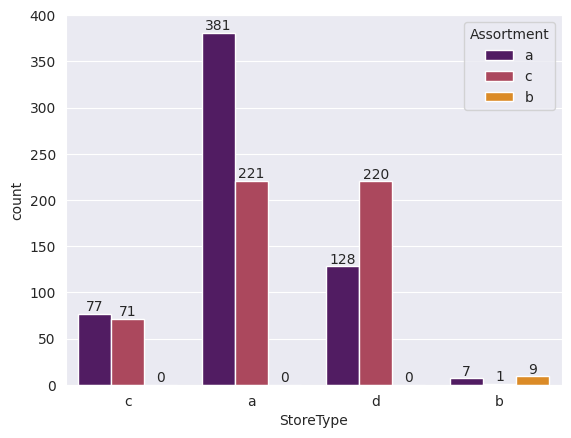

In [22]:
# Let's check assortment type count with respect to store type.
sns.set_style('darkgrid')
store_types= sns.countplot(x= 'StoreType', hue= 'Assortment', data= sales_df, palette= 'inferno')

for i in store_types.containers:
    store_types.bar_label(i)

## From abobe plot we can see that:
### In store type- c & a, assortment type-a is more compared to others.
### But in store type-d, assortment type-c is more compared to others.
### In each store type, assortment type-b is comparatively less.

## Let's check rossmann_df

In [23]:
rossmann_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [24]:
rossmann_df.shape

(1017209, 9)

In [25]:
rossmann_df.columns.tolist()

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

In [26]:
rossmann_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [27]:
rossmann_df.describe(include= 'all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN
top,NaN,NaN,2015-07-31,NaN,NaN,NaN,NaN,0,NaN
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
50%,5.580000e+02,4.000000e+00,NaN,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00
75%,8.380000e+02,6.000000e+00,NaN,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,NaN,0.000000e+00


In [28]:
len(rossmann_df[rossmann_df.duplicated()])

0

In [29]:
rossmann_df.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

### Here we can see that there are no Null values present in the data set.

<Axes: xlabel='Sales', ylabel='Density'>

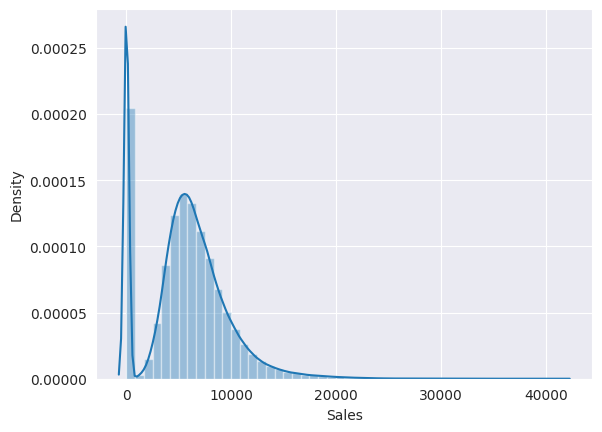

In [30]:
# Let's check the Sales column.
sns.distplot(rossmann_df.Sales)

## Here we can see that the Sales column is skewed(Right).
## So Median is more preferable than Mean.

In [31]:
# Let's convert the Dtype of column Date.
rossmann_df['Date']= pd.to_datetime(rossmann_df.Date)

In [32]:
# Let's extract Date, Month, Year from Date column.
rossmann_df['Day']= rossmann_df['Date'].apply(lambda x: x.day)
rossmann_df['Month']= rossmann_df['Date'].apply(lambda x: x.month)
rossmann_df['Year']= rossmann_df['Date'].apply(lambda x: x.year)

In [33]:
rossmann_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Day,Month,Year
0,1,5,2015-07-31,5263,555,1,1,0,1,31,7,2015
1,2,5,2015-07-31,6064,625,1,1,0,1,31,7,2015


In [34]:
# Let's check no of stores present in the data set.
rossmann_df.Store.nunique()

1115

In [35]:
# Let's check the starting and Final date of our data set.

print("Starting Date is: {0}".format(rossmann_df.Date.min()))
print("Final Date is: {0}".format(rossmann_df.Date.max()))
print("So there is {0} of Data.".format(rossmann_df.Date.max()-rossmann_df.Date.min()))

Starting Date is: 2013-01-01 00:00:00
Final Date is: 2015-07-31 00:00:00
So there is 941 days 00:00:00 of Data.


In [36]:
rossmann_df.Year.unique()

array([2015, 2014, 2013])

In [37]:
# Let's get the net sales per month for each year.
sales_per_month= rossmann_df.groupby(['Year', 'Month'])['Sales'].median().reset_index()


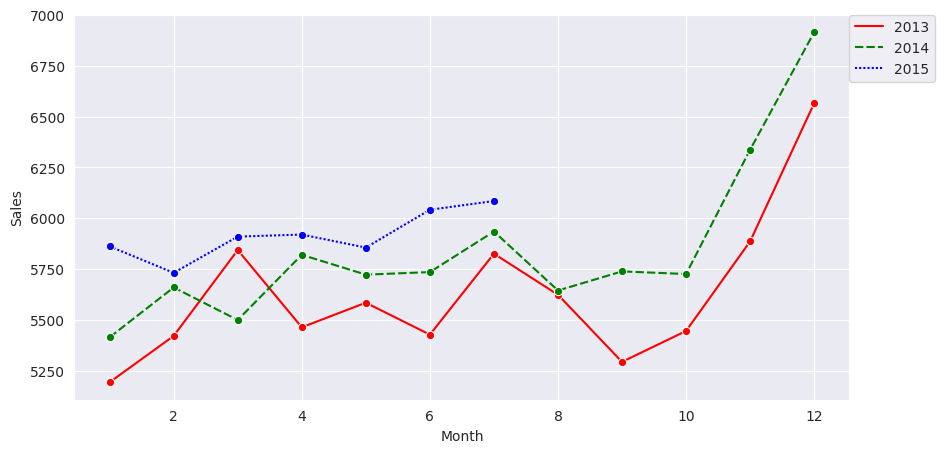

In [38]:
color= ['r', 'g', 'b']
plt.figure(figsize=(10,5))
sns.lineplot(x= 'Month', y= 'Sales', data= sales_per_month, hue= 'Year', palette= color, marker='o', style= 'Year')
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

## From above plot we can see that in the year of 2015 the sales run only upto the mopnth of July.

## We can also see that in the month of **October and December**, the sale is increasing exponentially.

## From further research we got that the reason behind the increase in sale is **Christmas and the upcoming New Year**

<Axes: >

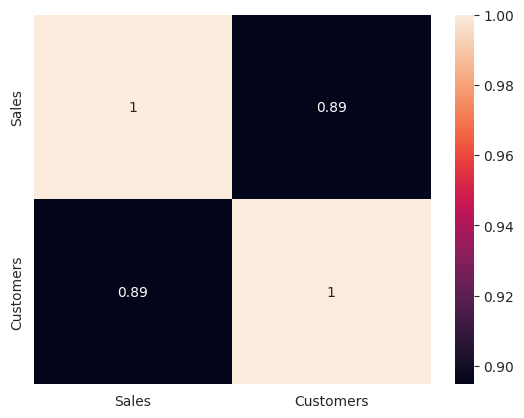

In [39]:
# Let's check the relation between Sales and Customers columns.
sns.heatmap(rossmann_df[['Sales', 'Customers']].corr(), annot= True)

In [40]:
# sns.lmplot(x= 'Sales' , y ='Customers',data=rossmann_df, palette='Greens', height=5,aspect=1, line_kws={'color':'red'})

## Here we can see that customers and sales are highly correlated.

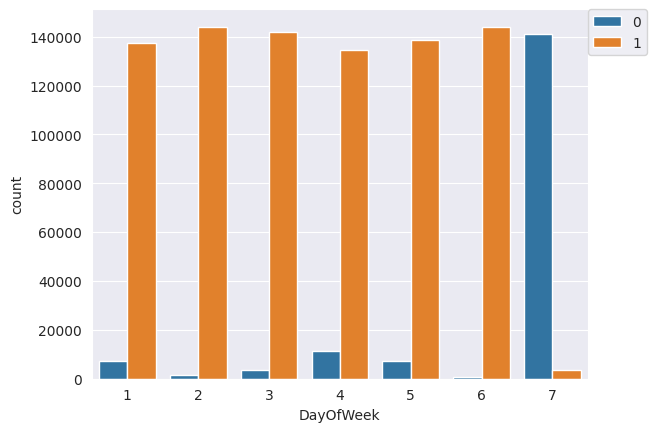

In [41]:
# Let's check the how many days and how many stores are open in a week.
sns.countplot(x= rossmann_df.DayOfWeek, hue= rossmann_df.Open)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

### Here we can clearly see that most of the stores are closed in Sundays.

<Axes: xlabel='Promo', ylabel='Sales'>

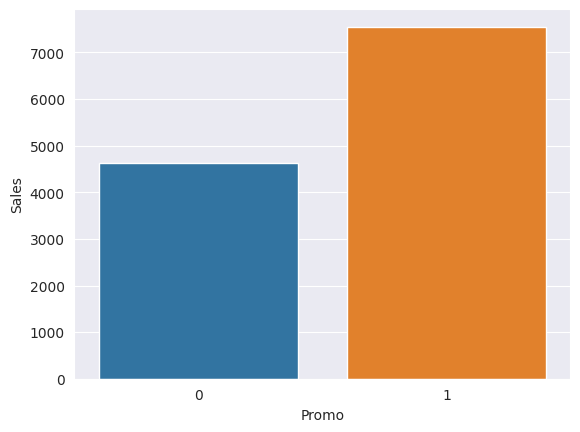

In [42]:
# Let's check the sales when promo is running and when not.
sales_wrt_promo = pd.DataFrame(rossmann_df.groupby('Promo').agg({'Sales':'median'})).reset_index()
sns.barplot(x= 'Promo', y= 'Sales', data= sales_wrt_promo)

## From above plot, we concluded that the sales when promo is running is high compared to the sales when promo is not running.

In [43]:
rossmann_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [44]:
# Let's check the impact of SchoolHoliday on Sales.
schoolholiday_vs_sale= rossmann_df.groupby('SchoolHoliday')['Sales'].median()   # As the sales is skewed, we are taking the median.
schoolholiday_vs_sale

SchoolHoliday
0    5642.0
1    6197.0
Name: Sales, dtype: float64

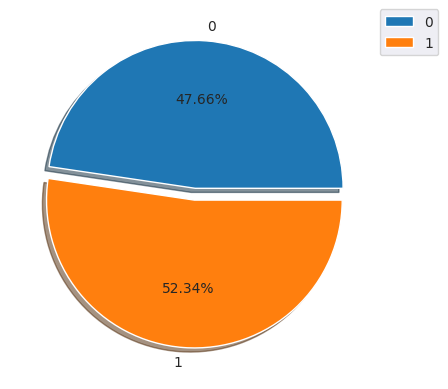

In [45]:
explode=[0.04, 0.04]
plt.pie(schoolholiday_vs_sale, labels= schoolholiday_vs_sale.index, autopct= '%1.2f%%', shadow= True, explode= explode)
plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)

## Here we can see that SchoolHoliday have some impact on sales.

## From above pie chart we saw that during SchooHoliday sales is more compared to the days where there is no SchoolHoliday.

In [46]:
# Let's check StateHoliday column
rossmann_df.StateHoliday.value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

### We can see that that there are categorical variables in StateHoliday column.

### So we will change that column to proper numerical column with valid reasoning.

In [47]:
# Creating a function to convert categorical values to numerical values.
def change_type(arg):
  if arg==0:
    arg=0
  elif arg=='0':
    arg= 0
  else:
    arg=1
  return arg

In [48]:
# Let's use the above function to change the data type of StateHoliday column.
rossmann_df.StateHoliday= rossmann_df.StateHoliday.apply(lambda x: change_type(x) )

In [49]:
# Let's check StateHoliday column again.
rossmann_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

In [50]:
stateholiday_vs_sale= rossmann_df.groupby(['StateHoliday', 'Open'])['Sales'].median().reset_index()
stateholiday_vs_sale

,StateHoliday,Open,Sales
0,0,0,0.0
1,0,1,6368.0
2,1,0,0.0
3,1,1,7649.5


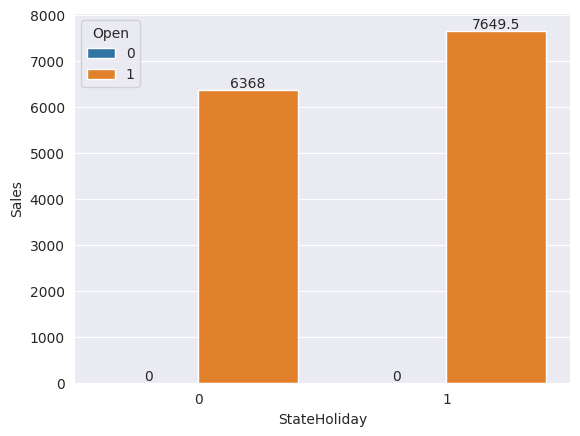

In [51]:
ax= sns.barplot(x= stateholiday_vs_sale.StateHoliday, y= stateholiday_vs_sale.Sales, hue= stateholiday_vs_sale.Open)
for i in ax.containers:
    ax.bar_label(i)

## Here we can see that in the days when there is StateHoliday, the sales is more compared to the days when there is no StateHoliday.

## Let's merge sales_df and rossmann_df.

In [52]:
# Merging 2 data frames.
df= pd.merge(sales_df, rossmann_df, how= 'right', on= 'Store')

In [53]:
# Let's rearrange the columns.
indexes= ['Store', 'StoreType', 'Assortment', 'Open', 'SchoolHoliday', 'StateHoliday', 'CompetitionDistance',
        'Promo', 'Promo2', 'Customers', 'Date','Day', 'Month', 'Year', 'DayOfWeek',  'Sales']

In [54]:
df= df.reindex(columns= indexes)

In [55]:
# checking the head
df.head()

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales
0,1,c,a,1,1,0,1270.0,1,0,555,2015-07-31,31,7,2015,5,5263
1,2,a,a,1,1,0,570.0,1,1,625,2015-07-31,31,7,2015,5,6064
2,3,a,a,1,1,0,14130.0,1,1,821,2015-07-31,31,7,2015,5,8314
3,4,c,c,1,1,0,620.0,1,0,1498,2015-07-31,31,7,2015,5,13995
4,5,a,a,1,1,0,29910.0,1,0,559,2015-07-31,31,7,2015,5,4822


<Axes: >

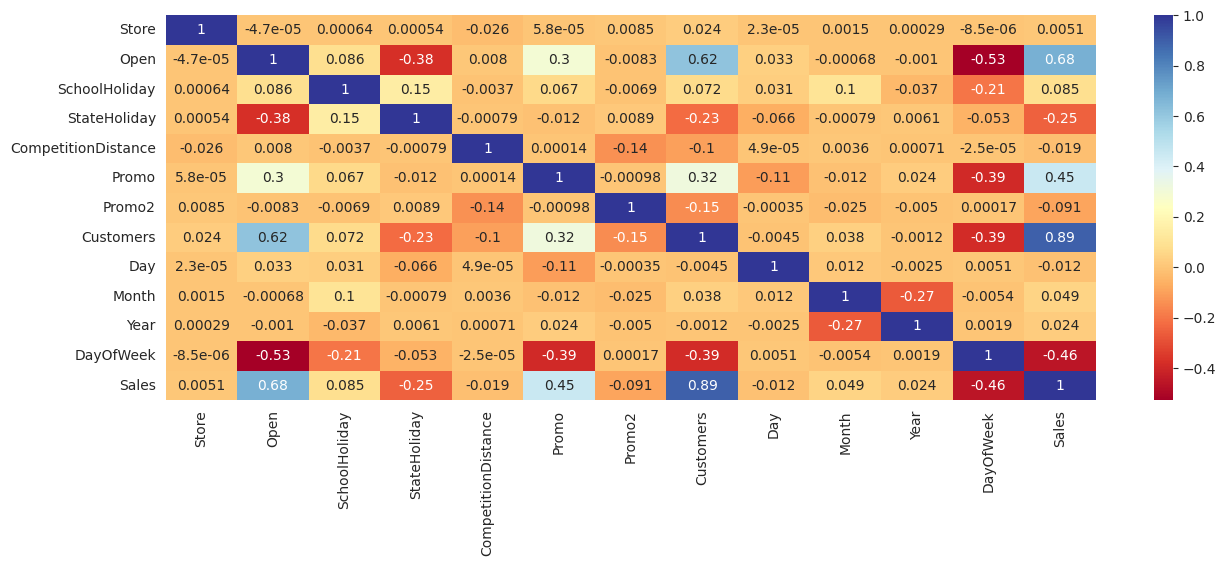

In [56]:
# Let's check the correlation between columns.
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot= True, cmap= 'RdYlBu')


In [57]:
# Let's create a column that contains the average spending done by customers.
df['Avg_sales_per_customer']= round(df.Sales / df.Customers, 2)

In [58]:
df.head(2)

,Store,StoreType,Assortment,Open,SchoolHoliday,StateHoliday,CompetitionDistance,Promo,Promo2,Customers,Date,Day,Month,Year,DayOfWeek,Sales,Avg_sales_per_customer
0,1,c,a,1,1,0,1270.0,1,0,555,2015-07-31,31,7,2015,5,5263,9.48
1,2,a,a,1,1,0,570.0,1,1,625,2015-07-31,31,7,2015,5,6064,9.70


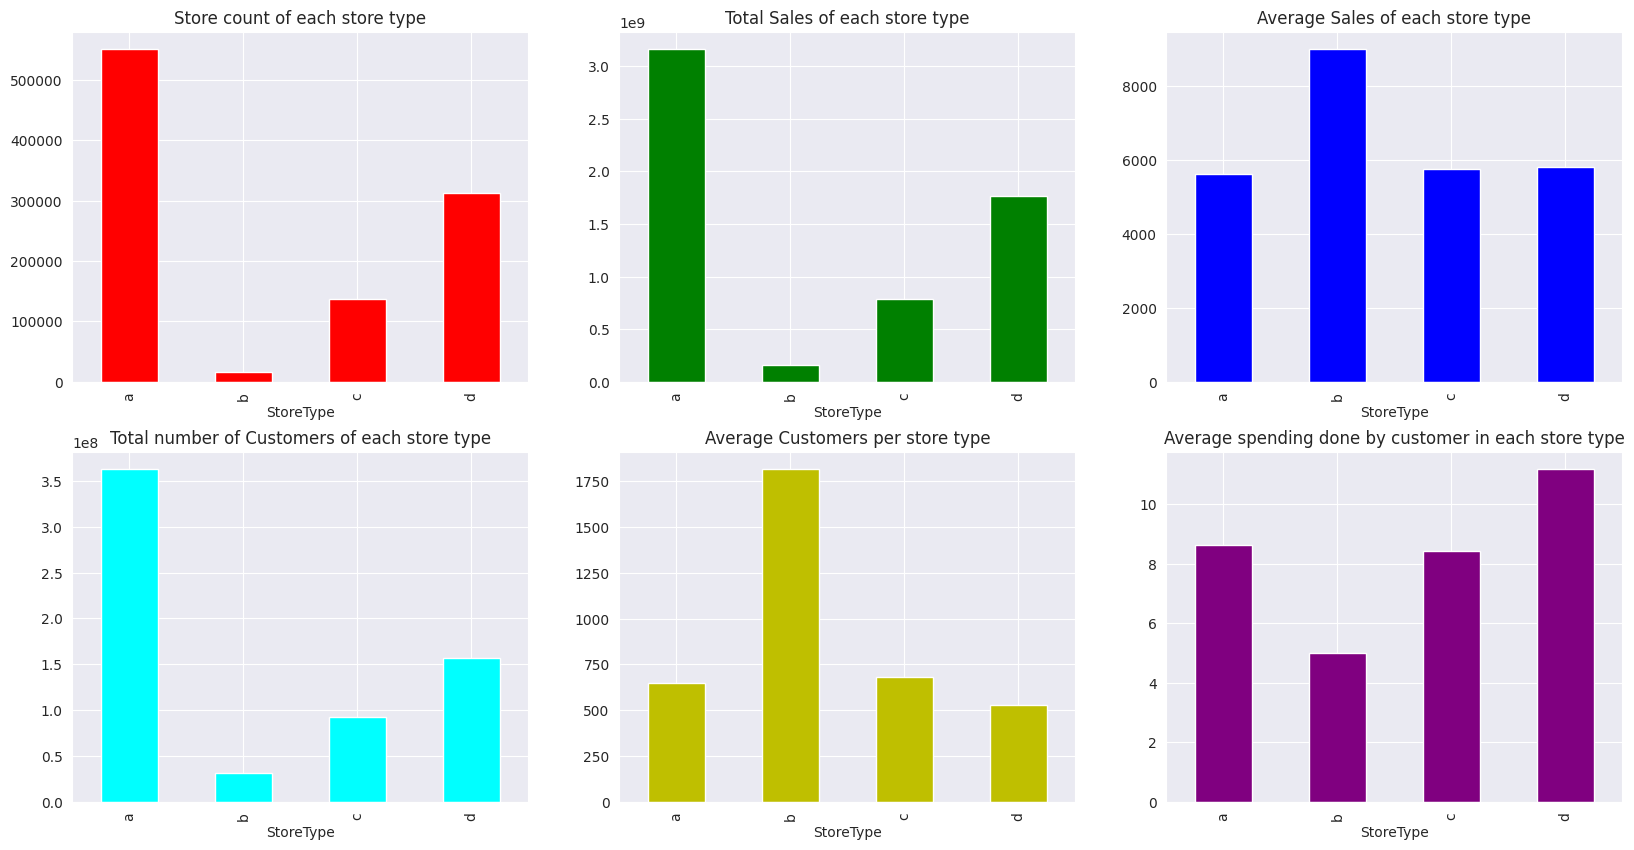

In [59]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], color= 'r', title = "Store count of each store type")
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], color= 'g', title = "Total Sales of each store type")
df.groupby("StoreType")["Sales"].median().plot(kind = "bar", ax = ax[0,2], color= 'b', title = "Average Sales of each store type")
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[1,0], color= 'cyan', title = "Total number of Customers of each store type")
df.groupby("StoreType")["Customers"].median().plot(kind = "bar", ax = ax[1,1], color= 'y', title = "Average Customers per store type")
df.groupby("StoreType")["Avg_sales_per_customer"].median().plot(kind = "bar", ax = ax[1,2], color= 'purple', title = "Average spending done by customer in each store type")

plt.subplots_adjust(hspace = 0.2, wspace= 0.2)
plt.show()

## Observations:
> The count of store type 'a' is maximun while store type 'b' is minimum.

> The total sale of store type 'a' is higher while the average sale of store type 'b' is higher compared to others.

> The total customers count of store type 'a' is higher while the average customer count of store type 'b' is higher.

> The average speding done by customers in store type 'd' is higher

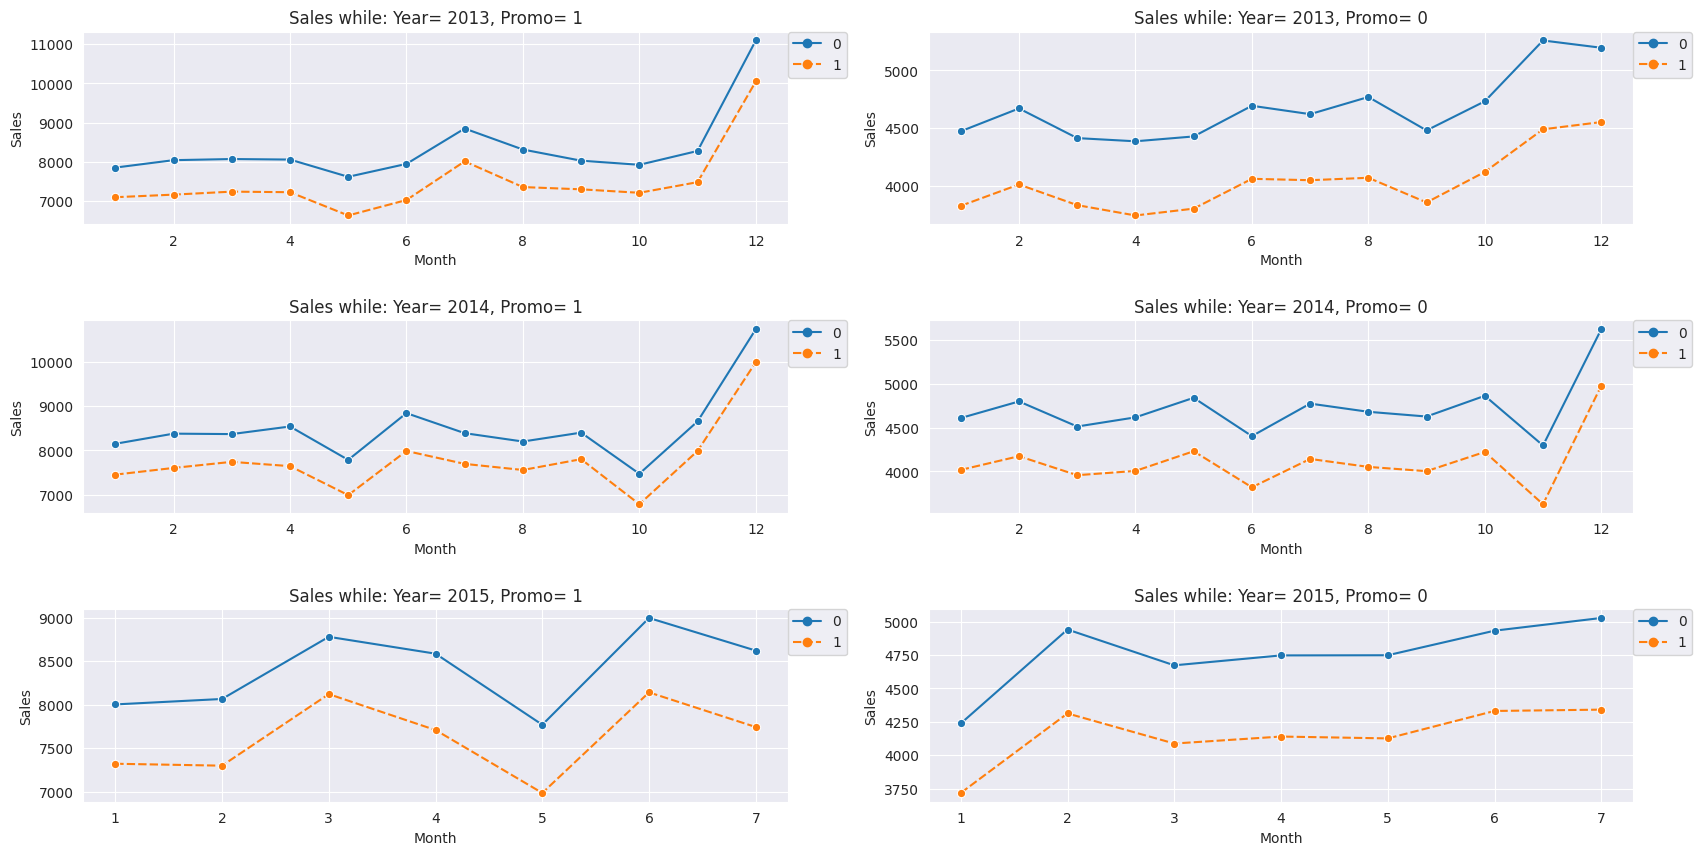

In [124]:
# Let's check the sales with respect to promo and promo2 for each year.
index= 1
plt.figure(figsize= (20,10))
for i in sorted(df.Year.unique().tolist()):
    for j in df.Promo.unique().tolist():
      plt.subplot(3,2,index)
      index +=1
      yearwise_data= df[df['Year']== i]
      promowise_data= yearwise_data[yearwise_data['Promo']== j]
      sns.lineplot(x= 'Month', y= 'Sales', data= promowise_data, hue= 'Promo2', ci= None, markers= 'o', style= 'Promo2')
      plt.title(f"Sales while: Year= {i}, Promo= {j}")
      plt.legend(bbox_to_anchor= (1,1), loc= 'upper left', borderaxespad=0)
      plt.subplots_adjust(hspace = 0.5, wspace= 0.2)

### From above plots we can see that the sale is high while the promo is running but promo2 has no such effect.

<Axes: xlabel='DayOfWeek', ylabel='Sales'>

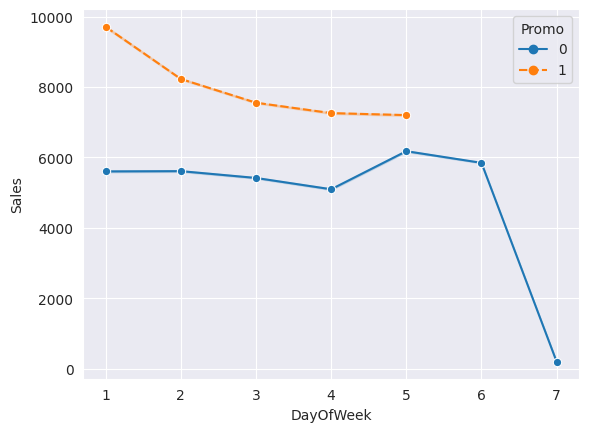

In [83]:
# Let's see the sales with respect to DayofWeek.
sns.lineplot(x= 'DayOfWeek', y= 'Sales', data= df, hue= 'Promo', markers= 'o', style= 'Promo')

### From above plot we can se that, the sales is decreasing in weekends.

### We can also see that the promo is running only in week days.